In [ ]:
!unzip /content/Dataset.zip

Archive:  /content/Dataset.zip
  inflating: bonn_fullSignal.csv     
  inflating: __MACOSX/._bonn_fullSignal.csv  
  inflating: bonn_shortSignal.csv    
  inflating: __MACOSX/._bonn_shortSignal.csv  
  inflating: bonnDatasetWorkspace.mat  
  inflating: __MACOSX/._bonnDatasetWorkspace.mat  
  inflating: bonnLabels_fullSignal.csv  
  inflating: __MACOSX/._bonnLabels_fullSignal.csv  
  inflating: bonnLabels_shortSignal.csv  
  inflating: __MACOSX/._bonnLabels_shortSignal.csv  
  inflating: readmeFile.docx         
  inflating: __MACOSX/._readmeFile.docx  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
messydata = pd.read_csv('/content/1sCHBsignal.csv', header = None)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7865 - loss: 0.5500 - val_accuracy: 0.9600 - val_loss: 0.4757
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9908 - loss: 0.0949 - val_accuracy: 0.9600 - val_loss: 0.3361
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0390 - val_accuracy: 0.9600 - val_loss: 0.3436
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0173 - val_accuracy: 0.9600 - val_loss: 0.4010
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 0.9600 - val_loss: 0.4453


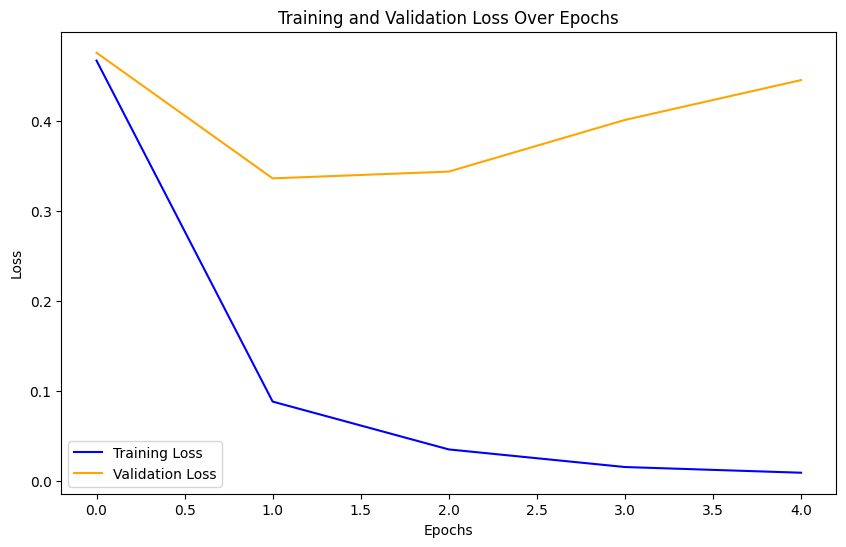

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


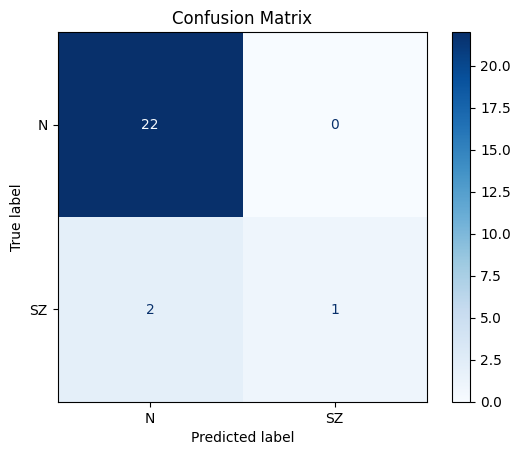

Classification Report:
              precision    recall  f1-score   support

           N       0.92      1.00      0.96        22
          SZ       1.00      0.33      0.50         3

    accuracy                           0.92        25
   macro avg       0.96      0.67      0.73        25
weighted avg       0.93      0.92      0.90        25



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the data
labels = pd.read_csv('/content/bonnLabels_fullSignal.csv', header=None)
data = pd.read_csv('/content/bonn_fullSignal.csv', header=None)

# Features (X) and labels (y)
X = data
y = labels[1]  # Replace with the appropriate column index if needed

# Convert string labels to numerical using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-Validation-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Build the ANN
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'linear' for regression tasks
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5, batch_size=32, verbose=1
)

# Plot the Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Threshold for binary classification

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8563 - loss: 0.5059 - val_accuracy: 0.9670 - val_loss: 0.1191
Epoch 2/8
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9721 - loss: 0.1025 - val_accuracy: 0.9757 - val_loss: 0.0754
Epoch 3/8
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9812 - loss: 0.0577 - val_accuracy: 0.9739 - val_loss: 0.0797
Epoch 4/8
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9834 - loss: 0.0481 - val_accuracy: 0.9722 - val_loss: 0.0766
Epoch 5/8
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0345 - val_accuracy: 0.9722 - val_loss: 0.0661
Epoch 6/8
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9903 - loss: 0.0295 - val_accuracy: 0.9704 - val_loss: 0.0713
Epoch 7/8
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9919 - loss: 0.0267 - val_accuracy: 0.9757 - val_loss: 0.0725
Epoch 8/8
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9942 - loss: 0.0176 - val_accuracy: 0.9739 - val_loss: 0

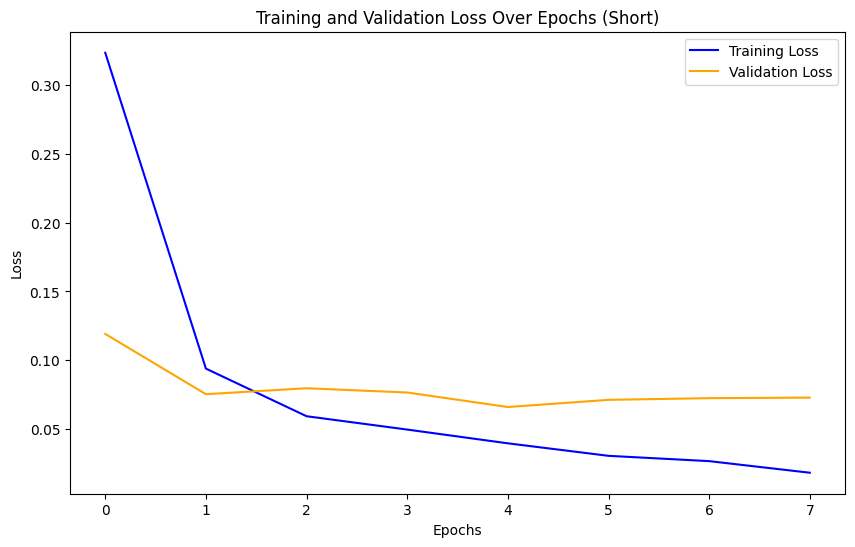

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


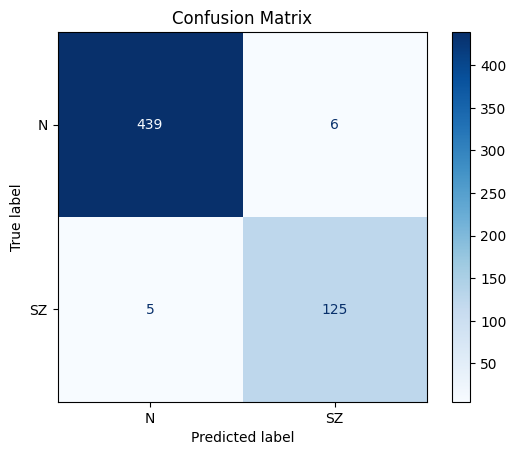

Classification Report:
              precision    recall  f1-score   support

           N       0.99      0.99      0.99       445
          SZ       0.95      0.96      0.96       130

    accuracy                           0.98       575
   macro avg       0.97      0.97      0.97       575
weighted avg       0.98      0.98      0.98       575



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the data
shortlabels = pd.read_csv('/content/bonnLabels_shortSignal.csv', header=None)
shortdata = pd.read_csv('/content/bonn_shortSignal.csv', header=None)

# Features (A) and labels (b)
A = shortdata
b = shortlabels[1]  # Replace with the appropriate column index if needed

# Convert string labels to numerical using LabelEncoder
label_encoder = LabelEncoder()
b = label_encoder.fit_transform(b)

# Train-Validation-Test Split
A_train, A_temp, b_train, b_temp = train_test_split(A, b, test_size=0.1, random_state=42)
A_val, A_test, b_val, b_test = train_test_split(A_temp, b_temp, test_size=0.5, random_state=42)

# Normalize features
shortscaler = StandardScaler()
A_train = shortscaler.fit_transform(A_train)
A_val = shortscaler.transform(A_val)
A_test = shortscaler.transform(A_test)

# Build the ANN
shortmodel = Sequential([
    Dense(64, input_dim=A_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'linear' for regression tasks
])

# Compile the model
shortmodel.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = shortmodel.fit(
    A_train, b_train,
    validation_data=(A_val, b_val),
    epochs=8, batch_size=32, verbose=1
)

# Plot the Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss Over Epochs (Short)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict on the test set
b_pred = (shortmodel.predict(A_test) > 0.5).astype(int)  # Threshold for binary classification

# Confusion Matrix
conf_matrix = confusion_matrix(b_test, b_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(b_test, b_pred, target_names=label_encoder.classes_))


In [ ]:
predictions = shortmodel.predict(messydata)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
print(predictions[2997])

[1.]


In [ ]:
# Function to predict data for a given label
def predict_data_for_label(label, n_samples=10, threshold=0.9):
    """
    Generates plausible data points for a given string label.

    Parameters:
        label (str): The target label (e.g., 'SZ' or 'N').
        n_samples (int): Number of data points to generate.
        threshold (float): Confidence threshold for the predicted label.

    Returns:
        plausible_data (np.ndarray): Generated data points.
    """
    # Convert string label to numeric
    numeric_label = label_encoder.transform([label])[0]
    plausible_data = []
    generated_samples = 0
    feature_dim = X_train.shape[1]  # Match the scaler's expected dimensions (174)
    f=0
    while generated_samples < n_samples:
        # Generate random feature values within the range of the preprocessed training data
        random_features = np.random.uniform(
            X_train.min(axis=0), X_train.max(axis=0), size=(1, feature_dim)
        )
        print(f)
        f+=1
        # Normalize the features using the trained scaler
        normalized_features = scaler.transform(random_features)

        # Get the model's prediction
        predicted_prob = model.predict(normalized_features, verbose=0)[0][0]

        # Check if the predicted probability matches the label with sufficient confidence
        if (numeric_label == 1 and predicted_prob >= threshold) or (numeric_label == 0 and predicted_prob <= (1 - threshold)):
            plausible_data.append(random_features.flatten())
            generated_samples += 1

    return np.array(plausible_data)

# Example usage: Generate 5 data points for the label 'SZ'
label_to_predict = 'N'  # Use string labels
predicted_data = predict_data_for_label(label_to_predict, n_samples=1, threshold=0.9)

# Display the results
print(f"Generated data for label '{label_to_predict}':")
print(predicted_data)


0
Generated data for label 'N':
[[4.88243773 4.32841054 0.99874486 ... 1.77454973 0.25916715 3.58724572]]


In [ ]:
# Function to predict data for a given label
def shortpredict_data_for_label(label, n_samples=10, threshold=0.9):
    """
    Generates plausible data points for a given string label.

    Parameters:
        label (str): The target label (e.g., 'SZ' or 'N').
        n_samples (int): Number of data points to generate.
        threshold (float): Confidence threshold for the predicted label.

    Returns:
        plausible_data (np.ndarray): Generated data points.
    """
    # Convert string label to numeric
    numeric_label = label_encoder.transform([label])[0]
    plausible_data = []
    generated_samples = 0
    feature_dim = A_train.shape[1]  # Match the scaler's expected dimensions (174)

    while generated_samples < n_samples:
        # Generate random feature values within the range of the preprocessed training data
        random_features = np.random.uniform(
            A_train.min(axis=0), A_train.max(axis=0), size=(1, feature_dim)
        )
        # Normalize the features using the trained scaler
        normalized_features = shortscaler.transform(random_features)

        # Get the model's prediction
        predicted_prob = shortmodel.predict(normalized_features, verbose=0)[0][0]

        # Check if the predicted probability matches the label with sufficient confidence
        if (numeric_label == 1 and predicted_prob >= threshold) or (numeric_label == 0 and predicted_prob <= (1 - threshold)):
            plausible_data.append(random_features.flatten())
            generated_samples += 1

    return np.array(plausible_data)

# Example usage: Generate 5 data points for the label 'SZ'
label_to_predict = 'SZ'  # Use string labels
shortpredicted_data = shortpredict_data_for_label(label_to_predict, n_samples=1)

# Display the results
print(f"Generated data for label '{label_to_predict}':")
print(shortpredicted_data)


Generated data for label 'SZ':
[[ -5.53352721   2.70158608   0.56573975   5.05246323   1.77059102
   -7.53043226   6.21476619   9.4909771    6.14800611   7.47964717
  -10.11948795  -6.71341598   7.25801932   7.10771662  -8.19484455
   -8.87532128  -9.38509827   5.02955991  -8.58823383   4.16383418
  -10.43404824   3.0079195   -3.50701959   1.36436312  10.6088462
    5.58372775   4.5377579  -10.50873682  -1.89953031 -10.74595192
    7.05618985   1.11887836  -0.10936478  -6.91691707  -1.25748618
    2.17206318  -4.89879461  -1.85668679  -3.18043129  -3.38579115
    3.13671291   1.05094777   2.4697111   -4.97698138  -2.718292
    3.80308463  -3.59749577  -5.90231888  -2.01243734  -9.64677442
   -8.57947507  -2.47104497  -1.32267159  -8.21080985  -6.27344742
   -9.83606075   3.70996685  -6.58948746   8.49829362  -2.04805485
    2.93247235  -7.88115347   8.63268224   5.16064044  -6.88643542
    1.94997541   4.44435243  -7.20927307  -5.56593073   6.59851887
    1.12356927  -6.26012959  -3.90

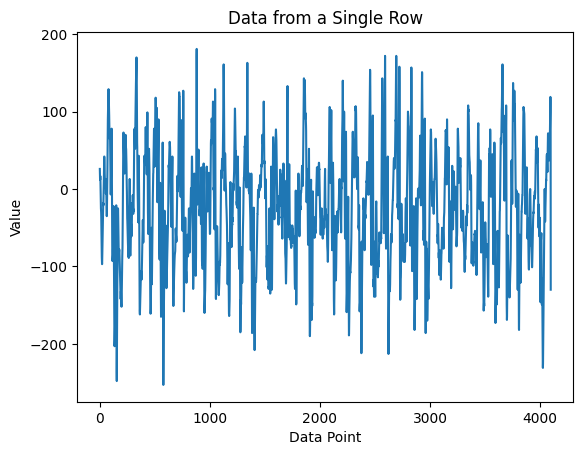

In [ ]:
plt.plot(data.iloc[2])
plt.xlabel("Data Point")
plt.ylabel("Value")
plt.title("Data from a Single Row")
plt.show()

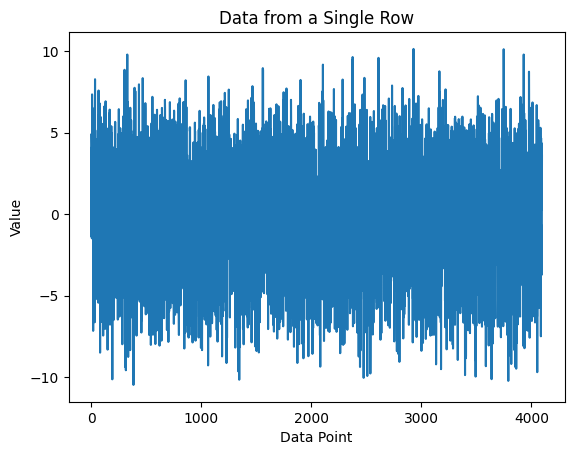

In [ ]:
plt.plot(predicted_data[0])
plt.xlabel("Data Point")
plt.ylabel("Value")
plt.title("Data from a Single Row")
plt.show()

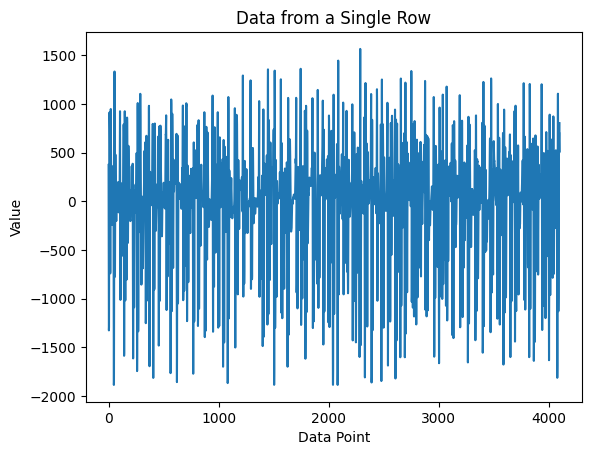

In [ ]:
plt.plot(data.iloc[309])
plt.xlabel("Data Point")
plt.ylabel("Value")
plt.title("Data from a Single Row")
plt.show()

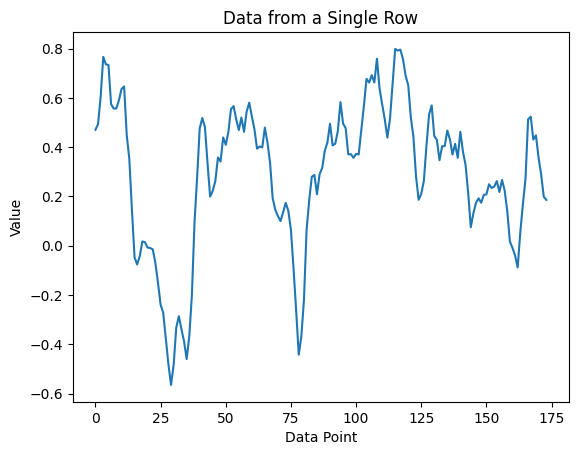

In [ ]:
plt.plot(shortdata.iloc[10])
plt.xlabel("Data Point")
plt.ylabel("Value")
plt.title("Data from a Single Row")
plt.show()

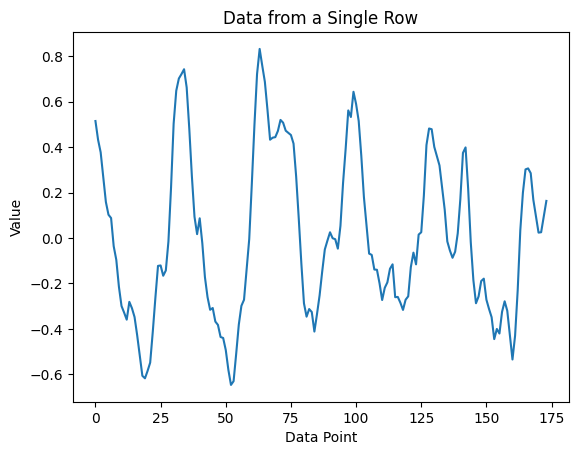

In [ ]:
plt.plot(A_train[6912])

plt.xlabel("Data Point")
plt.ylabel("Value")
plt.title("Data from a Single Row")
plt.show()

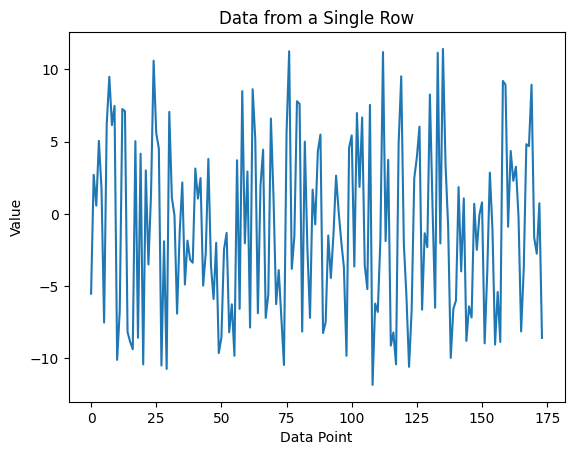

In [ ]:
for i in range(1):
  plt.plot(shortpredicted_data[i])
  plt.xlabel("Data Point")
  plt.ylabel("Value")
  plt.title("Data from a Single Row")
  plt.show()

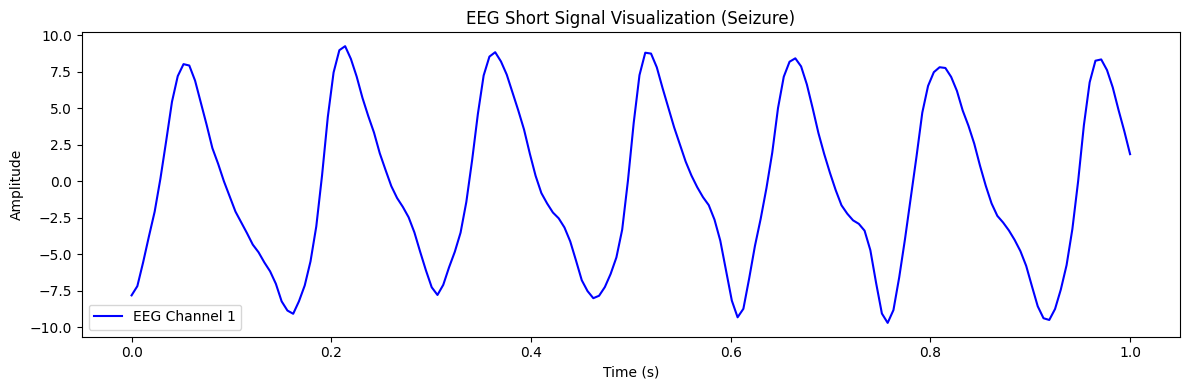

In [ ]:
# Get the actual number of samples from your data
n_samples = shortdata.shape[1]  # Assuming each row represents a time series

# Generate the time vector accordingly
time = np.linspace(0, 1, n_samples)

# Plot the EEG signal
plt.figure(figsize=(12, 4))
plt.plot(time, shortdata.iloc[7066], label='EEG Channel 1', color='blue')

# Customize the plot
plt.title('EEG Short Signal Visualization (Seizure)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()